<a href="https://colab.research.google.com/github/Ser9ibus/BaumVKR2/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coefficients: 
 [-1.96635465]
Mean squared error: 0.19
Mean absolute error: 0.36
coefficient of determination: 0.59
Intercept: 
 0.7757179200527622
Coefficients: 
 [  0.0697848  -14.40575795  18.10888186  -4.68598787]
Mean squared error: 0.00
Mean absolute error: 0.04
coefficient of determination: 0.99
Intercept: 
 0.9600192254409391
Coefficients: 
 [-6.67634381e+02  6.57168506e+04 -2.68555961e+06  5.85231220e+07
 -7.89066707e+08  7.17994165e+09 -4.64776641e+10  2.21026776e+11
 -7.86099367e+11  2.10270470e+12 -4.19376194e+12  6.03399876e+12
 -5.66713752e+12  2.07074904e+12  2.91505080e+12 -5.79576347e+12
  5.10265463e+12 -2.63773024e+12  7.74991926e+11 -1.00653212e+11]
Mean squared error: 513577.85
Mean absolute error: 107.84
coefficient of determination: -1121454.27
Intercept: 
 2.0413569299168457


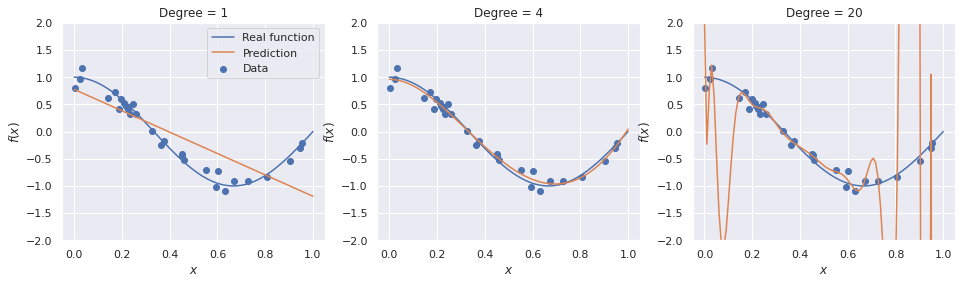

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter('ignore')
%matplotlib inline

sns.set(style='darkgrid')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline

np.random.seed(36)
x = np.linspace(0,1,100)
y = np.cos(1.5*np.pi*x)

x_objects = np.random.uniform(0,1,size=30)
y_objects = np.cos(1.5*np.pi*x_objects) + np.random.normal(scale=0.1, size=x_objects.shape)

from sklearn.preprocessing import PolynomialFeatures
fig, axs = plt.subplots(figsize=(16,4), ncols=3)
for i, degree in enumerate([1, 4, 20]):
  X_objects = PolynomialFeatures(degree, include_bias=False).fit_transform(x_objects[:, None])
  X = PolynomialFeatures(degree, include_bias=False).fit_transform(x[:,None])
  regr = LinearRegression().fit(X_objects, y_objects)
  y_pred = regr.predict(X)

  print('Coefficients: \n', regr.coef_)
  # Mean squared error
  print('Mean squared error: %.2f' % mean_squared_error(y, y_pred))
  # Mean absolute error
  print('Mean absolute error: %.2f' % mean_absolute_error(y, y_pred))
  # the coefficient of determination
  print('coefficient of determination: %.2f' % r2_score(y, y_pred))
  # Independent term in the linear model
  print('Intercept: \n', regr.intercept_)

  axs[i].plot(x,y, label='Real function')
  axs[i].scatter(x_objects, y_objects, label = 'Data')
  axs[i].plot(x,y_pred, label = 'Prediction')
  if i==0:
    axs[i].legend()
  axs[i].set_title('Degree = %d' % degree)
  axs[i].set_xlabel('$x$')
  axs[i].set_ylabel('$f(x)$')
  axs[i].set_ylim(-2,2)

(-2.0, 2.0)

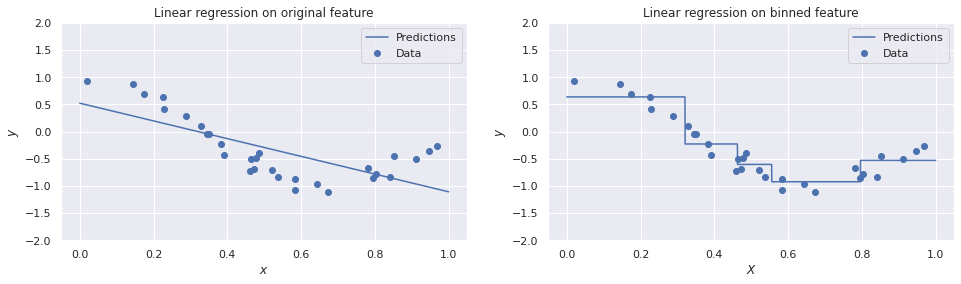

In [5]:
# Разбиение непрерывных данных на интервалы с последующей аппроксимацией в них
from sklearn.preprocessing import KBinsDiscretizer

x_plot = np.linspace(0,1, 10000)
X = np.random.uniform(0,1,size=30)
y = np.cos(1.5*np.pi*X) + np.random.normal(scale = 0.1, size = X.shape)

fig, axs = plt.subplots(figsize=(16,4), ncols=2)
regr = LinearRegression()
regr.fit(X[:,np.newaxis], y)

y_pred_regr = regr.predict(x_plot[:,np.newaxis])
axs[0].scatter(X[:,np.newaxis],y, label="Data")
axs[0].plot(x_plot, y_pred_regr, label='Predictions')
axs[0].legend()
axs[0].set_title('Linear regression on original feature')
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$y$')
axs[0].set_ylim(-2,2)

binner = KBinsDiscretizer(n_bins=5, strategy='quantile')
pipeline = Pipeline(steps = [
    ('binning', binner),
    ('regression', LinearRegression())
])
pipeline.fit(X[:,np.newaxis], y)
y_pred_binned = pipeline.predict(x_plot[:,np.newaxis])
axs[1].scatter(X[:,np.newaxis],y, label="Data")
axs[1].plot(x_plot, y_pred_binned, label='Predictions')
axs[1].legend()
axs[1].set_title('Linear regression on binned feature')
axs[1].set_xlabel('$X$')
axs[1].set_ylabel('$y$')
axs[1].set_ylim(-2,2)

Text(0, 0.5, '$y$')

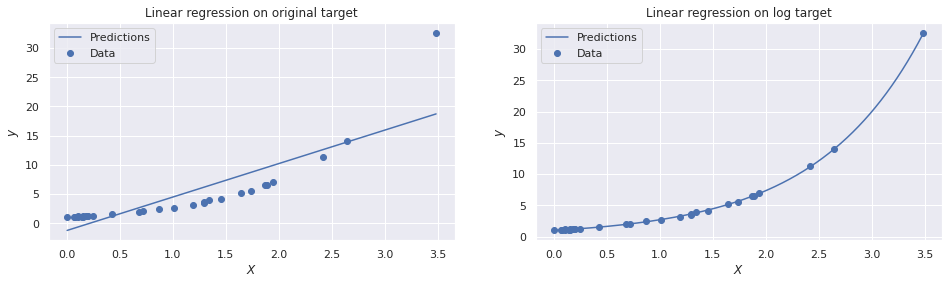

In [10]:
X = np.random.exponential(1,size=30)
y = np.exp(X) + np.random.normal(scale = 0.1, size = X.shape)

x_plot = np.linspace(np.min(X), np.max(X), 10000)

fig, axs = plt.subplots(figsize=(16,4), ncols=2)

regr = LinearRegression()
regr.fit(X[:,np.newaxis], y)

y_pred_regr = regr.predict(x_plot[:,np.newaxis])
axs[0].scatter(X[:,np.newaxis],y, label="Data")
axs[0].plot(x_plot, y_pred_regr, label='Predictions')
axs[0].legend()
axs[0].set_title('Linear regression on original target')
axs[0].set_xlabel('$X$')
axs[0].set_ylabel('$y$')

y_log = np.log(y)
regr.fit(X[:, np.newaxis], y_log)
y_pred_log = np.exp(regr.predict(x_plot[:, np.newaxis]))
axs[1].scatter(X[:,np.newaxis],y, label="Data")
axs[1].plot(x_plot, y_pred_log, label='Predictions')
axs[1].legend()
axs[1].set_title('Linear regression on log target')
axs[1].set_xlabel('$X$')
axs[1].set_ylabel('$y$')